In [2]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO
import os

In [6]:
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "33beb8302063463fae5d879567f248bc" #DSFace API

# Set image path from local file.
image_path = os.path.join('C:/Users/e3003895/Documents/NT/NT2.JPG')

assert subscription_key

In [7]:
# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the westcentralus region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
face_api_url = 'https://southeastasia.api.cognitive.microsoft.com/face/v1.0/detect'

image_data = open(image_path, "rb")

headers = {'Content-Type': 'application/octet-stream',
           'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,' +
    'emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

response = requests.post(face_api_url, params=params, headers=headers, data=image_data)
response.raise_for_status()
faces = response.json()



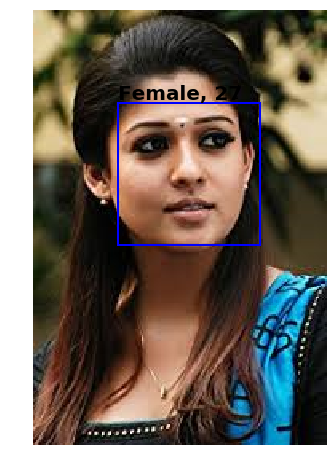

[{'faceId': '0cc49aac-8251-42a9-873a-7a1c68a9ca18', 'faceRectangle': {'top': 58, 'left': 53, 'width': 89, 'height': 89}, 'faceAttributes': {'smile': 0.033, 'headPose': {'pitch': 0.0, 'roll': -6.3, 'yaw': 6.6}, 'gender': 'female', 'age': 27.0, 'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.002, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.033, 'neutral': 0.96, 'sadness': 0.005, 'surprise': 0.0}, 'blur': {'blurLevel': 'low', 'value': 0.0}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.5}, 'noise': {'noiseLevel': 'low', 'value': 0.0}, 'makeup': {'eyeMakeup': True, 'lipMakeup': True}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.02, 'invisible': False, 'hairColor': [{'color': 'black', 'confidence': 0.99}, {'color': 'brown', 'confidence': 0.94}, {'color': 'gray', 'confidence': 0.68}, {'color': 'other', 'confidence': 0.1

In [8]:
# Display the original image and overlay it with the face information.
image_read = open(image_path, "rb").read()
image = Image.open(BytesIO(image_read))

plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=1)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(
        origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]),
             fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")
plt.show()

print(faces)

